In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 畫圖設定

In [23]:
font = {'family' : 'SimSun',
'weight': 'bold',
'size'  : '14'}
plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）

### Pandas setting

In [24]:
pd.set_option('display.max_rows', 10) 

In [25]:
df = pd.read_csv("Result.csv")
cols = list(df.columns)

In [26]:
df = df[df["Cluster"]==2]
df.iloc[:,18]
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率"].str.contains("總是", na=False), "在「能使用」電子支付的場合，使用電子支付之頻率"] = "高頻" 
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率"].str.contains("經常", na=False), "在「能使用」電子支付的場合，使用電子支付之頻率"] = "高頻" 
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率"].str.contains("有時", na=False), "在「能使用」電子支付的場合，使用電子支付之頻率"] = "低頻" 
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率"].str.contains("偶爾", na=False), "在「能使用」電子支付的場合，使用電子支付之頻率"] = "低頻" 
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率"].str.contains("極少", na=False), "在「能使用」電子支付的場合，使用電子支付之頻率"] = "低頻" 
df

,通常使用電子支付線下場域（多選） - 超商,通常使用電子支付線下場域（多選） - 餐廳,通常使用電子支付線下場域（多選） - 連鎖量販店,通常使用電子支付線下場域（多選） - 飲品、甜點店,通常使用電子支付線下場域（多選） - 小攤販（含夜市）,通常使用電子支付線下場域（多選） - 時尚精品店,通常使用電子支付線下場域（多選） - 交通運輸,通常使用電子支付線下場域（多選） - 其他,其他...9,通常使用電子支付廠商（多選） - Line Pay,...,請問您的年紀？,您目前身份,您的可支配所得,請留下您的信箱以供後續抽獎聯繫使用,填答時間,填答秒數,IP紀錄,tSNE X,tSNE Y,Cluster
9,1,0,0,1,0,0,1,0,NaN,1,...,19 歲 - 23 歲,大學在校生,"NTD 16,000 - NTD 24,000",cw4095908@gmail.com,2020-05-13 15:56:00,178,2404:0:8229:a69e:d05f:f1de:6bcb:feb6,3.680698,1.870361,2
13,1,1,1,1,1,0,0,0,NaN,1,...,19 歲 - 23 歲,大學在校生,"NTD 8,000 以下",rebecca423923@gmail.com,2020-05-13 17:01:00,186,140.119.154.16,7.152819,-2.046000,2
14,1,1,0,1,1,0,0,0,NaN,1,...,19 歲 - 23 歲,大學在校生,"NTD 16,000 - NTD 24,000",jennytwtpi860630@gmail.com,2020-05-13 17:04:00,172,123.193.99.46,-3.933607,-0.183755,2
15,1,1,1,0,0,0,0,0,NaN,1,...,24 歲 - 28 歲,碩士在校生,"NTD 16,000 - NTD 24,000",chiachiwicked@gmail.com,2020-05-13 17:09:00,212,2001:b400:e3ad:f674:90dd:d674:2ec5:b103,-4.869833,-3.114428,2
17,1,1,1,0,0,0,0,0,NaN,0,...,24 歲 - 28 歲,碩士在校生,"NTD 8,000 以下",gg6882469@yahoo.com.tw,2020-05-13 17:18:00,145,2001:b011:a408:12e3:e41c:138c:dcad:bcc0,-1.543692,-2.304398,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1,1,1,1,1,0,0,0,NaN,1,...,29 歲 以上,在職工作（全職）,"NTD 40,000 以上",e3860931@gmail.com,2020-05-20 21:06:00,195,36.230.122.181,-2.919140,-6.250539,2
359,1,1,1,1,0,0,1,0,NaN,0,...,24 歲 - 28 歲,在職工作（全職）,"NTD 40,000 以上",fallen9291@hotmail.com.tw,2020-05-20 21:16:00,213,2001:b011:6c01:3f72:4580:f555:1a4f:a9da,0.037016,-2.054147,2
361,1,1,1,0,0,0,0,0,NaN,1,...,24 歲 - 28 歲,在職工作（全職）,"NTD 24,000 - NTD 32,000",la041212@gmail.com,2020-05-20 21:17:00,169,2001:b400:e354:c9c7:2d9f:8203:144d:f1da,5.800278,-4.437990,2
362,1,1,0,1,1,0,0,0,NaN,1,...,24 歲 - 28 歲,在職工作（全職）,"NTD 32,000 - NTD 40,000",beavistsai@gmail.com,2020-05-20 21:23:00,200,2402:7500:588:605f:fdb8:71c5:a27c:ce84,4.546726,-4.185053,2


### PCA

In [73]:
satis = df[cols[19:27] + [cols[-1]]]
satis = satis.reset_index().drop(["index"],axis=1)
satis

,使用順暢度,優惠活動,進入障礙（您「註冊程序」到「知道如何使用功能」所需花費的時間）,卡別限制,是否容易操作（操作流程是否方便、人性化）,可使用店家普及度,資訊安全,具消費記錄功能,Cluster
0,5,5,1,1,5,4,3,5,2
1,5,4,5,4,5,4,4,5,2
2,3,5,3,3,4,4,3,4,2
3,5,2,5,5,5,5,3,5,2
4,5,1,2,5,5,5,5,5,2
...,...,...,...,...,...,...,...,...,...
168,5,5,3,5,5,5,3,5,2
169,4,3,1,3,4,3,1,4,2
170,4,5,1,2,3,3,3,4,2
171,5,5,1,1,5,3,4,5,2


In [28]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [29]:
satis2 = preprocessing.scale(satis)

In [30]:
satis2.shape

(173, 9)

In [31]:
pca = PCA(n_components=1)
pca.fit(satis2)
score = pca.transform(satis2)

In [106]:
print(pca.components_)
print(pca.explained_variance_ratio_)
score.shape

pca_result = pd.concat((pd.DataFrame(satis.iloc[:, 0:].columns, columns = ['Variable']), 
                pd.DataFrame(abs(pca.components_.T), columns = ['Loading'])), 
                axis = 1).sort_values(by='Loading', ascending = False)

pca_result = pca_result.drop([8]).reset_index().drop(["index"],axis=1)
pca_result 

[[-0.3898269  -0.20580457 -0.32038599 -0.27256845 -0.48581893 -0.37193179
  -0.38560937 -0.32510128  0.        ]]
[0.31070894]


,Variable,Loading
0,是否容易操作（操作流程是否方便、人性化）,0.485819
1,使用順暢度,0.389827
2,資訊安全,0.385609
3,可使用店家普及度,0.371932
4,具消費記錄功能,0.325101
5,進入障礙（您「註冊程序」到「知道如何使用功能」所需花費的時間）,0.320386
6,卡別限制,0.272568
7,優惠活動,0.205805


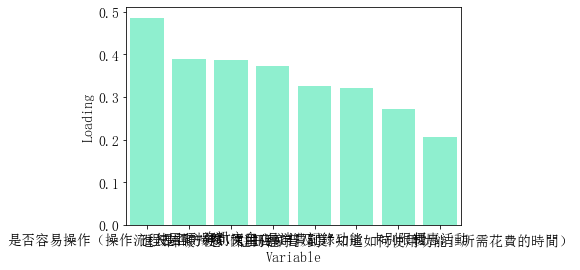

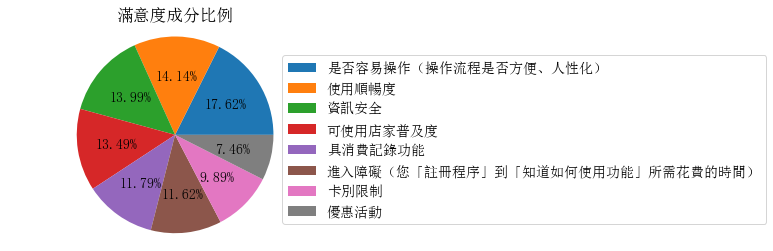

In [148]:
sns.barplot('Variable', 'Loading', data=pca_result, color="aquamarine")
plt.show()

plt.pie(pca_result["Loading"] , autopct = "%2.2f%%")
plt.title("滿意度成分比例")
plt.axis('equal')
plt.legend(labels=pca_result["Variable"], bbox_to_anchor=(0.8,0.9))
plt.tight_layout()
plt.show()

In [34]:
pd.set_option('display.max_rows', 10)
satis["PCA"] = pd.DataFrame(score)
satis

,使用順暢度,優惠活動,進入障礙（您「註冊程序」到「知道如何使用功能」所需花費的時間）,卡別限制,是否容易操作（操作流程是否方便、人性化）,可使用店家普及度,資訊安全,具消費記錄功能,Cluster,PCA
0,5,5,1,1,5,4,3,5,2,-0.138533
1,5,4,5,4,5,4,4,5,2,-2.082478
2,3,5,3,3,4,4,3,4,2,1.130548
3,5,2,5,5,5,5,3,5,2,-1.785923
4,5,1,2,5,5,5,5,5,2,-1.696866
...,...,...,...,...,...,...,...,...,...,...
168,5,5,3,5,5,5,3,5,2,-1.956195
169,4,3,1,3,4,3,1,4,2,2.774274
170,4,5,1,2,3,3,3,4,2,2.249039
171,5,5,1,1,5,3,4,5,2,-0.209903


In [35]:
# from pycaret.classification import *
# clf1 = setup(data = satis, target="Cluster", pca = True, pca_components = 1)

### 變數篩選用Dataframe

In [36]:
from  scipy.stats import chi2_contingency

In [37]:
filter_df = df[cols[27:58] + [cols[18]]]
filter_df["Count"] = 1
filter_df.reset_index().drop(["index"],axis=1)

,使用現金的經驗會影響我使用電子支付之意願,使用信用卡的經驗會影響我使用電子支付之意願,消費額度會影響我使用電子支付之意願（多選） - 是，消費額度高於3000我傾向不使用電子支付,消費額度會影響我使用電子支付之意願（多選） - 是，消費額度介於2000到3000我傾向不使用電子支付,消費額度會影響我使用電子支付之意願（多選） - 是，消費額度介於1000到2000我傾向不使用電子支付,消費額度會影響我使用電子支付之意願（多選） - 是，消費額度低於1000我傾向不使用電子支付,消費額度會影響我使用電子支付之意願（多選） - 否，消費額度高低不影響,排隊人潮多寡會影響我使用電子支付之意願,既有的信用卡紅利累計會影響我使用電子支付之意願,同儕也使用會影響我使用電子支付之意願,...,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 連鎖量販店,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 飲品、甜點店,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 小攤販（含夜市）,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 時裝精品店,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 交通運輸,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 不影響,下列使用電子支付線下場域會降低我使用電子支付之意願（多選） - 其他,其他...58,在「能使用」電子支付的場合，使用電子支付之頻率,Count
0,是，使用現金的經驗會令我更傾向使用電子支付,否，使用信用卡的經驗不影響我使用電子支付之意願,0,0,0,0,1,否，排隊人潮多寡不影響,是，既有的信用卡紅利累計會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
1,否，使用現金的經驗不影響我使用電子支付之意願,是，使用信用卡的經驗會令我更傾向使用電子支付,0,0,0,0,1,否，排隊人潮多寡不影響,是，既有的信用卡紅利累計會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
2,否，使用現金的經驗不影響我使用電子支付之意願,是，使用信用卡的經驗會令我更不傾向使用電子支付,1,0,0,0,0,否，排隊人潮多寡不影響,是，既有的信用卡紅利累計會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,低頻,1
3,否，使用現金的經驗不影響我使用電子支付之意願,否，使用信用卡的經驗不影響我使用電子支付之意願,0,0,0,0,1,否，排隊人潮多寡不影響,否，既有的信用卡紅利累計不會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
4,是，使用現金的經驗會令我更傾向使用電子支付,否，使用信用卡的經驗不影響我使用電子支付之意願,0,0,0,0,1,是，排隊人潮越多我會越想使用電子支付,是，既有的信用卡紅利累計會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,否，使用現金的經驗不影響我使用電子支付之意願,是，使用信用卡的經驗會令我更傾向使用電子支付,0,0,0,0,1,否，排隊人潮多寡不影響,否，既有的信用卡紅利累計不會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
169,是，使用現金的經驗會令我更傾向使用電子支付,否，使用信用卡的經驗不影響我使用電子支付之意願,0,0,0,0,1,是，排隊人潮越多我會越想使用電子支付,是，既有的信用卡紅利累計會令我更傾向使用電子支付,是，同儕也使用會影響,...,0,0,0,0,0,1,0,NaN,高頻,1
170,是，使用現金的經驗會令我更傾向使用電子支付,是，使用信用卡的經驗會令我更傾向使用電子支付,0,0,0,0,1,否，排隊人潮多寡不影響,是，既有的信用卡紅利累計會令我更傾向使用電子支付,否，同儕也使用不影響,...,0,0,0,0,0,1,0,NaN,高頻,1
171,是，使用現金的經驗會令我更傾向使用電子支付,是，使用信用卡的經驗會令我更傾向使用電子支付,0,0,0,0,1,否，排隊人潮多寡不影響,是，既有的信用卡紅利累計會令我更傾向使用電子支付,是，同儕也使用會影響,...,0,0,0,0,0,1,0,NaN,高頻,1


In [38]:
filter_df.pivot_table(index=cols[34],columns=cols[18],values="Count", aggfunc=np.sum).fillna(0)

在「能使用」電子支付的場合，使用電子支付之頻率,低頻,高頻
排隊人潮多寡會影響我使用電子支付之意願,,
否，排隊人潮多寡不影響,11.0,117.0
是，排隊人潮越多我會越想使用電子支付,8.0,30.0
是，排隊人潮越多我越不想使用電子支付,0.0,7.0


In [39]:
# 高頻:1 低頻:0

for i in range(30):
    test1 = filter_df.pivot_table(index=cols[i+27],columns=cols[18],values="Count", aggfunc=np.sum).fillna(0)
    kf_data = np.array(test1)
    kf = chi2_contingency(kf_data, correction = True)
    

    print(cols[i+27])
    print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)


#如果沒做錯的話  比較顯著的變數是 
#p_value <0.05 :消費額度( 只有在2000~3000 低於1000不顯著 )、同儕、
#p_value <0.1 :消費額度( 只有在2000~3000 低於1000不顯著 )、同儕、使用信用卡的經驗、排隊人潮、信用卡紅利累計

使用現金的經驗會影響我使用電子支付之意願
chisq-statistic=1.7044, p-value=0.4265, df=2 expected_frep=[[  5.49132948  44.50867052]
 [  0.32947977   2.67052023]
 [ 13.17919075 106.82080925]]
使用信用卡的經驗會影響我使用電子支付之意願
chisq-statistic=4.4933, p-value=0.1058, df=2 expected_frep=[[ 8.12716763 65.87283237]
 [ 0.54913295  4.45086705]
 [10.32369942 83.67630058]]
消費額度會影響我使用電子支付之意願（多選） - 是，消費額度高於3000我傾向不使用電子支付
chisq-statistic=6.9764, p-value=0.0083, df=1 expected_frep=[[ 17.46242775 141.53757225]
 [  1.53757225  12.46242775]]
消費額度會影響我使用電子支付之意願（多選） - 是，消費額度介於2000到3000我傾向不使用電子支付
chisq-statistic=0.5176, p-value=0.4719, df=1 expected_frep=[[ 18.12138728 146.87861272]
 [  0.87861272   7.12138728]]
消費額度會影響我使用電子支付之意願（多選） - 是，消費額度介於1000到2000我傾向不使用電子支付
chisq-statistic=8.0175, p-value=0.0046, df=1 expected_frep=[[ 18.45086705 149.54913295]
 [  0.54913295   4.45086705]]
消費額度會影響我使用電子支付之意願（多選） - 是，消費額度低於1000我傾向不使用電子支付
chisq-statistic=0.4067, p-value=0.5237, df=1 expected_frep=[[ 18.78034682 152.21965318]
 [  0.21965318   1.78034682]]

### 分類用Dataframe

In [40]:
#p_value <0.1 :消費額度( 只有在2000~3000 低於1000不顯著 )、同儕、使用信用卡的經驗、排隊人潮、信用卡紅利累計

In [41]:
clas = df[cols[58:65] + [cols[18]]].reset_index().drop(["index"],axis=1)
clas["總體滿意度"] = satis["PCA"]
clas.loc[clas["總體滿意度"] < 0,"總體滿意度"] = "高"
clas.loc[clas["總體滿意度"] != "高", "總體滿意度"] = "低"
last_col = clas.pop(clas.columns[-1])
clas.insert(0, last_col.name, last_col)
clas = clas.drop(['使用現金支付的消費頻率',"我身邊親人用電子支付之多寡（1幾乎都沒有，5大部分都有）"], axis=1)
clas = pd.get_dummies(clas, columns=["在「能使用」電子支付的場合，使用電子支付之頻率"], drop_first=True)
clas = clas.sort_values(list(clas.columns))
clas

,總體滿意度,使用信用卡支付的消費頻率,過往能使用電子支付情境下，通常的消費額度,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,在「能使用」電子支付的場合，使用電子支付之頻率_高頻
94,低,20%以下（極少）,1000以下,1,1,3,1
13,低,20%以下（極少）,1000以下,1,1,4,1
41,低,20%以下（極少）,1000以下,1,3,2,0
151,低,20%以下（極少）,1000以下,1,3,2,1
18,低,20%以下（極少）,1000以下,2,1,2,1
...,...,...,...,...,...,...,...
128,高,80-100%（總是）,1000以下,4,4,1,1
4,高,80-100%（總是）,1000以下,5,1,1,1
45,高,80-100%（總是）,1000以下,5,5,4,1
150,高,80-100%（總是）,1000以下,5,5,4,1


In [92]:
new_clas = pd.get_dummies(clas, columns=["總體滿意度"], drop_first=True)

new_clas.loc[new_clas["使用信用卡支付的消費頻率"].str.contains("總是", na=False), "使用信用卡支付的消費頻率"] = 1
new_clas.loc[new_clas["使用信用卡支付的消費頻率"].str.contains("經常", na=False), "使用信用卡支付的消費頻率"] = 2
new_clas.loc[new_clas["使用信用卡支付的消費頻率"].str.contains("有時", na=False), "使用信用卡支付的消費頻率"] = 3
new_clas.loc[new_clas["使用信用卡支付的消費頻率"].str.contains("偶爾", na=False), "使用信用卡支付的消費頻率"] = 4
new_clas.loc[new_clas["使用信用卡支付的消費頻率"].str.contains("極少", na=False), "使用信用卡支付的消費頻率"] = 5

new_clas.loc[new_clas["過往能使用電子支付情境下，通常的消費額度"]=="1000以下", "過往能使用電子支付情境下，通常的消費額度"] = 1
new_clas.loc[new_clas["過往能使用電子支付情境下，通常的消費額度"]=="1000-2000", "過往能使用電子支付情境下，通常的消費額度"] = 2
new_clas.loc[new_clas["過往能使用電子支付情境下，通常的消費額度"]=="2000-3000", "過往能使用電子支付情境下，通常的消費額度"] = 3
new_clas.loc[new_clas["過往能使用電子支付情境下，通常的消費額度"]=="3000以上", "過往能使用電子支付情境下，通常的消費額度"] = 4
new_clas = new_clas.astype('int32')

last_col = new_clas.pop(new_clas.columns[-1])
new_clas.insert(0, last_col.name, last_col)

new_clas

,總體滿意度_高,使用信用卡支付的消費頻率,過往能使用電子支付情境下，通常的消費額度,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,在「能使用」電子支付的場合，使用電子支付之頻率_高頻
94,0,5,1,1,1,3,1
13,0,5,1,1,1,4,1
41,0,5,1,1,3,2,0
151,0,5,1,1,3,2,1
18,0,5,1,2,1,2,1
...,...,...,...,...,...,...,...
128,1,1,1,4,4,1,1
4,1,1,1,5,1,1,1
45,1,1,1,5,5,4,1
150,1,1,1,5,5,4,1


### 隨機森林

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [154]:
X = new_clas.iloc[:,:6]
Y = new_clas.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
X

,總體滿意度_高,使用信用卡支付的消費頻率,過往能使用電子支付情境下，通常的消費額度,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）
94,0,5,1,1,1,3
13,0,5,1,1,1,4
41,0,5,1,1,3,2
151,0,5,1,1,3,2
18,0,5,1,2,1,2
...,...,...,...,...,...,...
128,1,1,1,4,4,1
4,1,1,1,5,1,1
45,1,1,1,5,5,4
150,1,1,1,5,5,4


0.8980952380952381 51


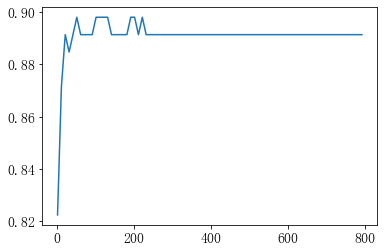

In [47]:
scorel =[]
for i in range(0,800,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.plot(range(1,801,10), scorel)

0.8985714285714286 46


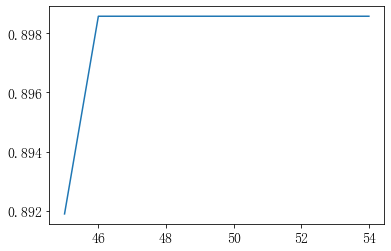

In [64]:
scorel =[]
for i in range(45,55):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(45,55)][scorel.index(max(scorel))]))
plt.plot(range(45,55), scorel)

In [155]:
rfc = RandomForestClassifier(n_estimators=46,random_state=22)
rfc = rfc.fit(x_train,y_train)
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

# print()
# rfc.feature_importances_

rfc_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(rfc.feature_importances_.T, columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

rfc_result.reset_index().drop(["index"],axis=1)

R^2 Training Score:0.9727891156462585 R^2 Validation Score:0.8846153846153846


,Variable,Importance
0,使用信用卡支付的消費頻率,0.264264
1,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,0.221327
2,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,0.197988
3,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,0.183046
4,總體滿意度_高,0.077292
5,過往能使用電子支付情境下，通常的消費額度,0.056084


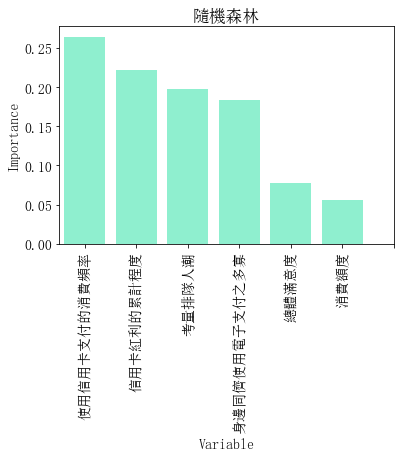

In [157]:
variable_list = ['使用信用卡支付的消費頻率','信用卡紅利的累計程度','考量排隊人潮','身邊同儕使用電子支付之多寡','總體滿意度','消費額度']
x1 = [0,1,2,3,4,5,6]
ax = sns.barplot('Variable', 'Importance', data=rfc_result, color="aquamarine")
plt.xticks(x1, labels=variable_list, rotation=90)
plt.title("隨機森林")
plt.show()

In [50]:
# rfc.predict(x_test)

#### 把滿意度拆開來

In [170]:
high_freq = new_clas.loc[new_clas["總體滿意度_高"] == 1]
low_freq = new_clas.loc[new_clas["總體滿意度_高"] == 0]

#### 高滿意度建模

In [171]:
X = high_freq.iloc[:,1:6]
Y = high_freq.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

0.8535714285714284 11


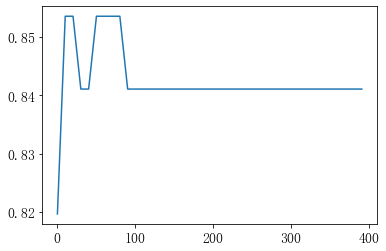

In [101]:
scorel =[]
for i in range(0,400,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.plot(range(1,401,10), scorel)

0.8535714285714284 5


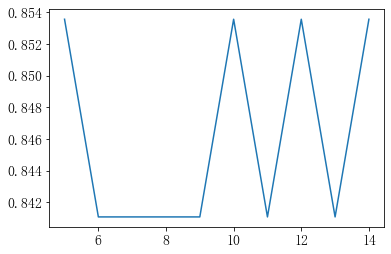

In [111]:
scorel =[]
for i in range(5,15):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(5,15)][scorel.index(max(scorel))]))
plt.plot(range(5,15), scorel)

In [172]:
rfc = RandomForestClassifier(n_estimators=5,random_state=22)
rfc = rfc.fit(x_train,y_train)
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

# print()
# rfc.feature_importances_

rfc_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(rfc.feature_importances_.T, columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

rfc_result

R^2 Training Score:0.96 R^2 Validation Score:1.0


,Variable,Importance
3,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,0.350150
0,使用信用卡支付的消費頻率,0.250151
2,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,0.182265
4,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,0.172652
1,過往能使用電子支付情境下，通常的消費額度,0.044783


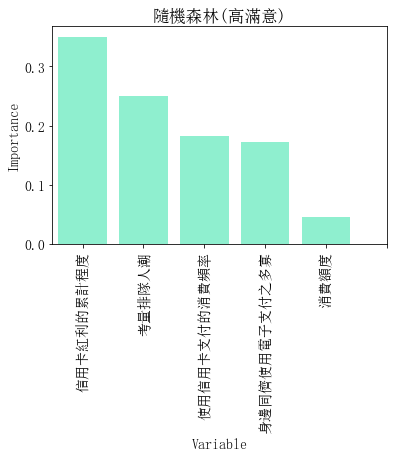

In [173]:
variable_list = ['信用卡紅利的累計程度','考量排隊人潮','使用信用卡支付的消費頻率','身邊同儕使用電子支付之多寡','消費額度']
x1 = [0,1,2,3,4,5]
ax = sns.barplot('Variable', 'Importance', data=rfc_result, color="aquamarine")
plt.xticks(x1, labels=variable_list, rotation=90)
plt.title("隨機森林(高滿意)")
plt.show()

#### 低滿意度建模

In [174]:
X = low_freq.iloc[:,1:6]
Y = low_freq.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

0.8607142857142855 31


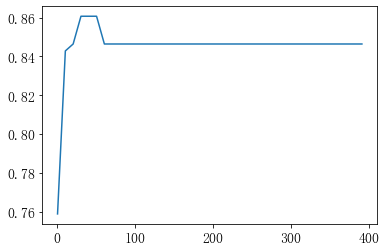

In [122]:
scorel =[]
for i in range(0,400,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.plot(range(1,401,10), scorel)

0.8607142857142855 25


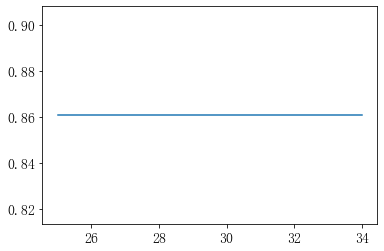

In [123]:
scorel =[]
for i in range(25,35):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=22
                                )
    score = cross_val_score(rfc, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(25,35)][scorel.index(max(scorel))]))
plt.plot(range(25,35), scorel)

In [175]:
rfc = RandomForestClassifier(n_estimators=25,random_state=22)
rfc = rfc.fit(x_train,y_train)
train_score = rfc.score(x_train, y_train)
test_score = rfc.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

# print()
# rfc.feature_importances_

rfc_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(rfc.feature_importances_.T, columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

rfc_result.reset_index().drop(["index"],axis=1)
# #在低滿意度的狀況下， 信用卡的消費頻率扮演很重要的因子決定使用者是否會常使用電子支付

R^2 Training Score:0.9577464788732394 R^2 Validation Score:0.7692307692307693


,Variable,Importance
0,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,0.268201
1,使用信用卡支付的消費頻率,0.248219
2,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,0.229668
3,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,0.214762
4,過往能使用電子支付情境下，通常的消費額度,0.039150


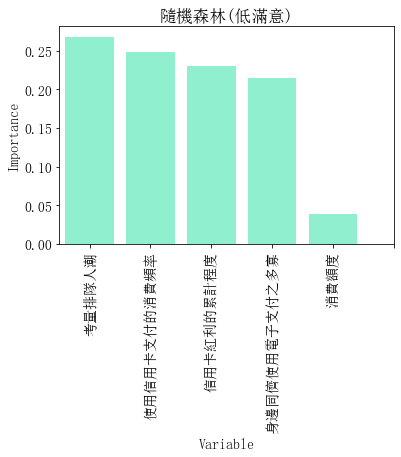

In [176]:
variable_list = ['考量排隊人潮','使用信用卡支付的消費頻率','信用卡紅利的累計程度','身邊同儕使用電子支付之多寡','消費額度']
x1 = [0,1,2,3,4,5]
ax = sns.barplot('Variable', 'Importance', data=rfc_result, color="aquamarine")
plt.xticks(x1, labels=variable_list, rotation=90)
plt.title("隨機森林(低滿意)")
plt.show()

### 羅吉斯回歸

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [186]:
X = new_clas.iloc[:,:6]
Y = new_clas.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

0.7285714285714285 1


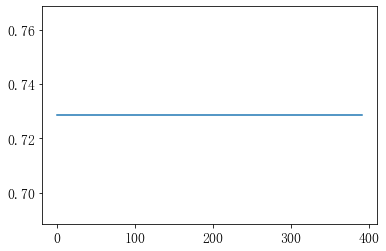

In [187]:
scorel =[]
for i in range(0,400,10):
    lr= LogisticRegression(C=i+1,
                            n_jobs=-1,
                            random_state=22,
                            class_weight='balanced'
                            )
    score = cross_val_score(lr, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.plot(range(1,401,10), scorel)

0.7285714285714285 0


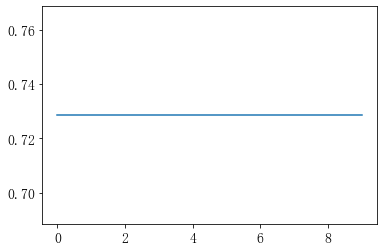

In [188]:
scorel =[]
for i in range(0,10):
    lr= LogisticRegression(C=i+1,
                            n_jobs=-1,
                            random_state=22,
                            class_weight='balanced'
                            )
    score = cross_val_score(lr, x_train, y_train, cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(0,10)][scorel.index(max(scorel))]))
plt.plot(range(0,10), scorel)

In [192]:
lr= LogisticRegression(C=25,
                        n_jobs=-1,
                        random_state=22,
                        class_weight='balanced'
                        )
lr.fit(x_train, y_train)
# Scoring
train_score = cross_val_score(lr, x_train, y_train, cv=10).mean()
test_score = lr.score(x_test, y_test)
print('R^2 Training Score:{}'.format(train_score),'R^2 Validation Score:{}'.format(test_score))

R^2 Training Score:0.7285714285714285 R^2 Validation Score:0.6153846153846154


In [194]:
print(lr.intercept_)

lr_result = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                pd.DataFrame(lr.coef_.T, columns = ['Coefficient']),
                pd.DataFrame(abs(lr.coef_.T), columns = ['Importance'])), 
                axis = 1).sort_values(by='Importance', ascending = False)

lr_result.reset_index().drop(["index"],axis=1)

[6.77668674]


,Variable,Coefficient,Importance
0,使用信用卡支付的消費頻率,-1.273077,1.273077
1,過往能使用電子支付情境下，通常的消費額度,-1.116565,1.116565
2,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,-0.356160,0.356160
3,總體滿意度_高,-0.192989,0.192989
4,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,-0.040588,0.040588
5,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,0.009956,0.009956


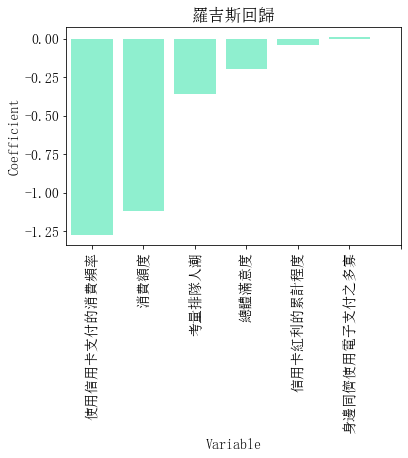

In [197]:
variable_list = ['使用信用卡支付的消費頻率','消費額度','考量排隊人潮','總體滿意度','信用卡紅利的累計程度','身邊同儕使用電子支付之多寡']
x1 = [0,1,2,3,4,5,6]
ax = sns.barplot('Variable', 'Coefficient', data=lr_result, color="aquamarine")
plt.xticks(x1, labels=variable_list, rotation=90)
plt.title("羅吉斯回歸")
plt.show()

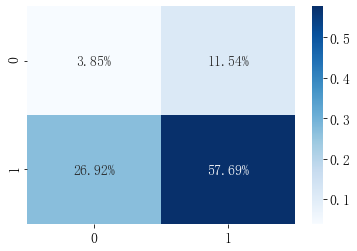

In [198]:
#Generate predictions with the model using our X values
y_pred = lr.predict(x_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')